In [1]:
train_time = 1
param_num = 450340
local_data_num=20
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*local_data_num + comm_time*local_data_num
fedsgd_time_per_round = train_time*8*local_data_num + comm_time*local_data_num*2
fedavg_time_per_round = train_time*8*local_data_num + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60
method_round_time = [fedavg_time_per_round,fedsgd_time_per_round,fwdgrad_time_per_round]
dataset = "20news"

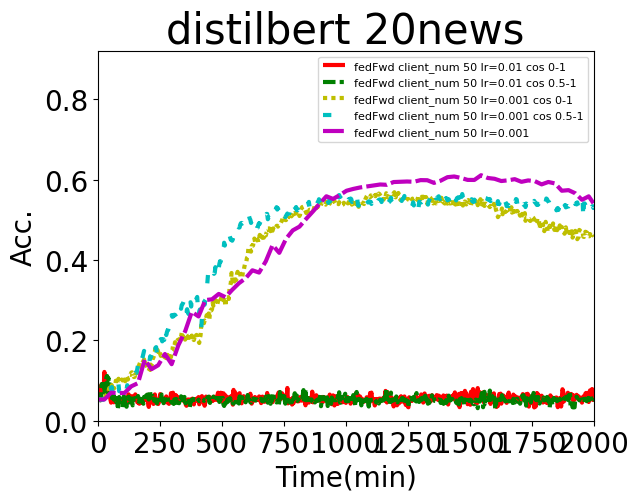

In [2]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [50]
method_list = ["fedFwd"]
model_list = ["distilbert"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.01","0.001"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for i,lr in enumerate(learning_rate_list):
        for method_id,method in enumerate(method_list):
            acc_lists = []
            for j,client_num in enumerate(client_num_list):
                acc = []
                with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
                    log = f.readlines()
                    for l in log:
                        if "'acc':" in l:
                            acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                        # if len(acc)>200:
                        #     break
                plt.plot([t*method_round_time[method_id]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i*3], color=colors[i*3],label=f"{method} client_num {client_num} lr={lr} cos 0-1",linewidth=lw)
                
                acc = []
                with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}_cos_above_0.5.log","r") as f:
                    log = f.readlines()
                    for l in log:
                        if "'acc':" in l:
                            acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                        # if len(acc)>200:
                        #     break
                plt.plot([t*method_round_time[method_id]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i*3+1], color=colors[i*3+1],label=f"{method} client_num {client_num} lr={lr} cos 0.5-1",linewidth=lw)
                if lr == "0.001":
                    acc = []
                    with open(f"../../time_to_acc_diff_client_num/distilbert_{dataset}_total_client100/{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
                        log = f.readlines()
                        for l in log:
                            if "'acc':" in l:
                                acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                            # if len(acc)>200:
                            #     break
                    plt.plot([t*method_round_time[method_id]*eval_frequence*10 for t in range(len(acc))], acc, linestyle=linestyle[i*3+2], color=colors[i*3+2],label=f"{method} client_num {client_num} lr={lr}",linewidth=lw)

            
        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,2000)
        plt.yticks(size = 20)
        plt.ylim(0.0,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


In [3]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [5,50,200,500,1000]
method_list = ["fedavg","fedsgd","fedFwd"]
model_list = ["distilbert"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.001"]
dataset = "agnews"
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        acc_lists = []
        for i,client_num in enumerate(client_num_list):
            acc = []
            with open(f"{method}_{model}_{dataset}_lr0.01_client_num_{client_num}.log","r") as f:
                log = f.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)

        plt.xlabel("Round",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,500)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'fedavg_distilbert_agnews_lr0.01_client_num_5.log'